In [1]:
import numpy as np
#Numpy, Python programlama dilinde sayısal hesaplamalar için kullanılan bir kütüphanedir.
import pandas as pd
#Pandas, Python programlama dilinde veri analizi ve veri manipülasyonu için kullanılan bir kütüphanedir. 
import matplotlib.pyplot as plt
#Matplotlib, Python programlama dilinde veri görselleştirme için kullanılan bir kütüphanedir.
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

import os 

import seaborn as sns

In [2]:
df=pd.read_csv("https://gist.githubusercontent.com/Ironraptor3/34f3938c703111353ee5f28cc9b29d68/raw/5c57e51dbc550a141a44f93028104ffce6281624/vgsales.csv")
#Data github sitesinden read_csv komutu ile çağırılır. 

In [3]:
df.sample(5)
#Sample komutu data içerisinden parantez içindeki sayı kadar satırı listeler.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
854,7829,Allied General,PS,1996,Strategy,SSI,0.11,0.07,0.00,0.01,0.19
5544,6835,Super Monkey Ball Deluxe,PS2,2005,Misc,Sega,0.12,0.09,0.00,0.03,0.24
8417,1294,Chrono Trigger,DS,2008,Role-Playing,Square Enix,0.69,0.20,0.49,0.09,1.47
3115,6573,Drakan: The Ancients' Gates,PS2,2002,Adventure,Sony Computer Entertainment,0.13,0.10,0.00,0.03,0.26
15852,14604,OZMAFIA!! -vivace-,PSV,2015,Adventure,dramatic create,0.00,0.00,0.03,0.00,0.03


In [4]:
df.isna().sum()
# isna veya isnull komutu data içerisindeki nan yani eksik, boş, hatalı verileri listeler.

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [5]:
df.dropna(inplace=True)
# dropna data içerisindeki nan değerler olan satırları kaldırır.

In [6]:
df.isnull().sum()
# burada görüldüğü gibi işlem sonrasında datada nan değer kalmamıştır. 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16314,16477,Total War Attila: Tyrants & Kings,PC,2016,Strategy,Koch Media,0.00,0.01,0.00,0.0,0.01
16315,16533,Sébastien Loeb Rally Evo,XOne,2016,Racing,Milestone S.r.l,0.00,0.01,0.00,0.0,0.01
16316,16534,Hitman (2016),XOne,2016,Action,Square Enix,0.00,0.01,0.00,0.0,0.01
16317,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
16318,16558,Codename: Panzers Complete Collection,PC,2016,Strategy,Nordic Games,0.00,0.01,0.00,0.0,0.01
16319,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.0,0.01
16320,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.0,0.01
16321,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.0,0.01
16322,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.0,0.01
16323,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.0,0.01


In [8]:
non_numeric_columns = df.select_dtypes(include=['object']).columns

In [9]:
df_numeric = df.drop(columns=non_numeric_columns)

In [10]:
correlation_matrix = df_numeric.corr()

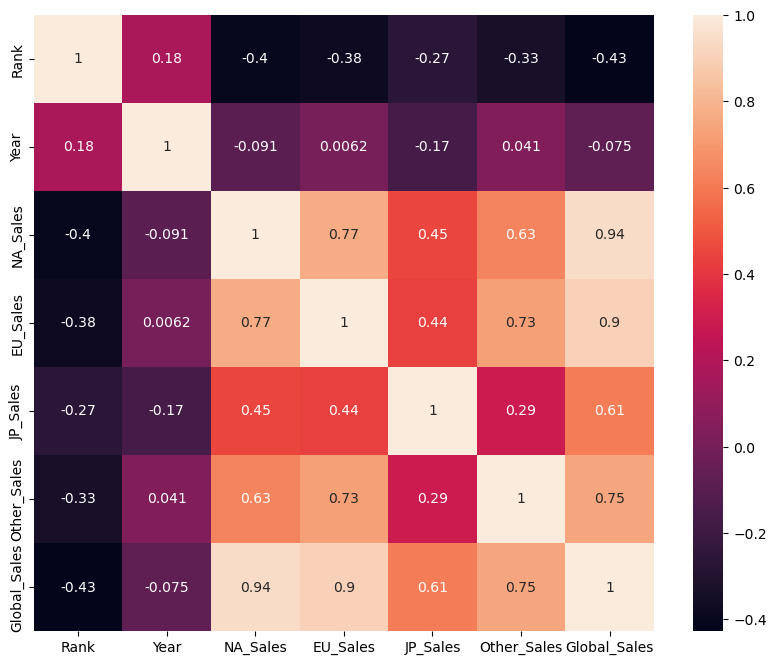

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [12]:
df2 =df.sort_values(by='Global_Sales',ascending=False)

In [13]:
df2.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8322,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
9750,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
188,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6113,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
6114,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9751,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
108,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [14]:
df['Genre'].unique()


array(['Shooter', 'Misc', 'Fighting', 'Sports', 'Action', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [15]:
df["Platform"].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU',
       'PS4', 'XOne'], dtype=object)

In [16]:
df['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int64)

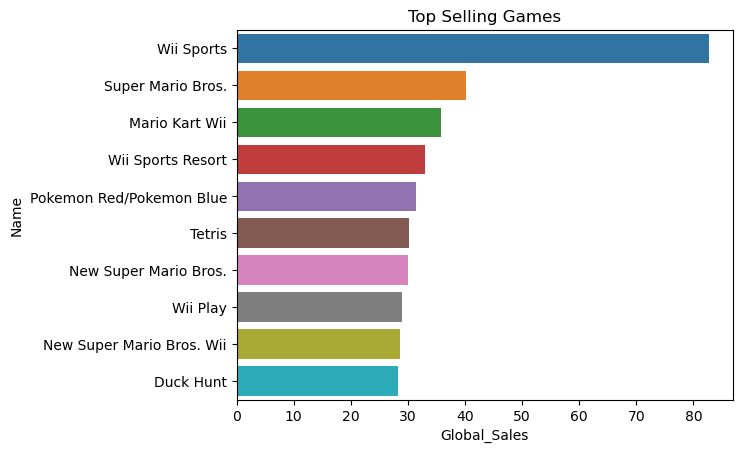

In [17]:
sns.barplot(y=df2.Name.head(10),x=df2.Global_Sales.head(10));
plt.title("Top Selling Games");

In [18]:
genre_sales=df.groupby(["Genre"])["Global_Sales"].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Genre Sales')

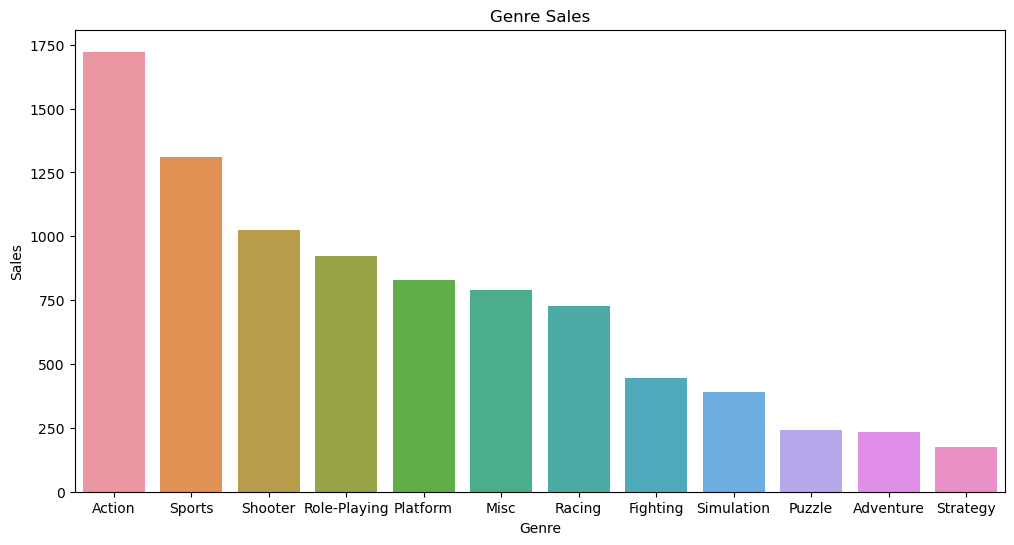

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index,y=genre_sales)
plt.ylabel("Sales")
plt.title("Genre Sales")

In [32]:
action_games = df[df['Genre'] == 'Action']

In [33]:
sales_per_year_action = action_games.groupby('Year')['Global_Sales'].sum().reset_index()

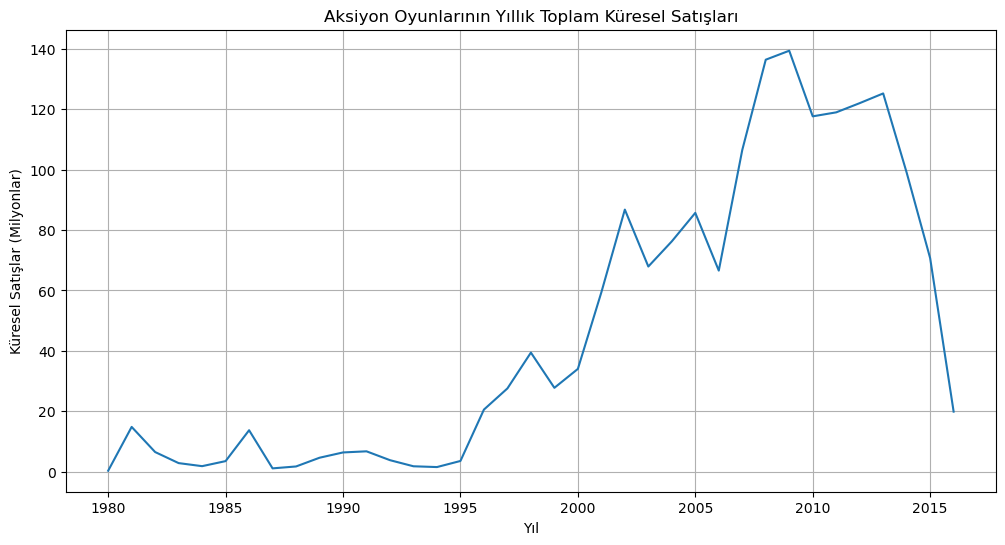

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_year_action, x='Year', y='Global_Sales')
plt.title('Aksiyon Oyunlarının Yıllık Toplam Küresel Satışları')
plt.xlabel('Yıl')
plt.ylabel('Küresel Satışlar (Milyonlar)')
plt.grid(True)
plt.show()

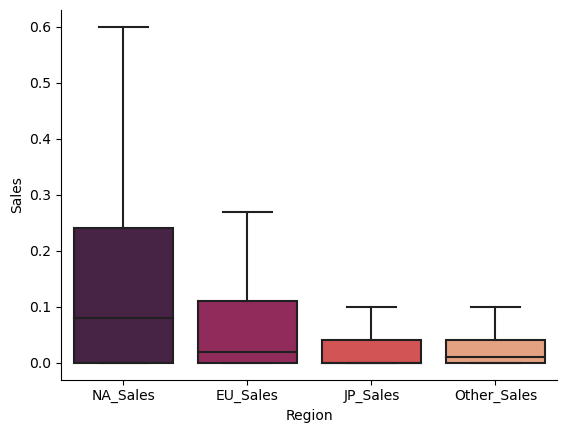

In [35]:
# Melt the DataFrame
games_melted = pd.melt(df, 
                       id_vars=['Name',"Year"], 
                       value_vars=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'], 
                       var_name='Region', 
                       value_name='Sales')

# Now we can graph our boxplot
sns.boxplot(x='Region', y='Sales', data=games_melted, palette='rocket', showfliers=False)
sns.despine()

In [23]:
data=genre_sales
labels=[]
for x in genre_sales.index:
    labels.append(x)

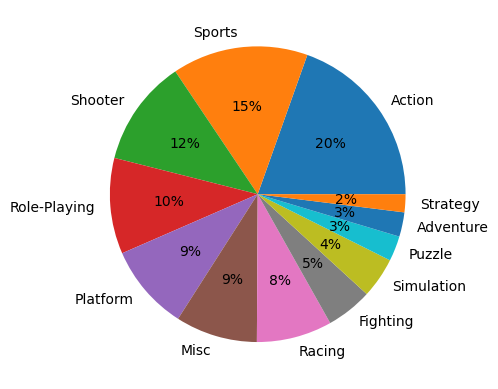

<Figure size 1200x700 with 0 Axes>

In [24]:
plt.pie(data,labels=labels, autopct='%.0f%%')
plt.figure(figsize=(12,7))
plt.show();


In [25]:
Top_platforms=df.groupby(["Platform"])["Global_Sales"].sum().sort_values(ascending=False).head(10)

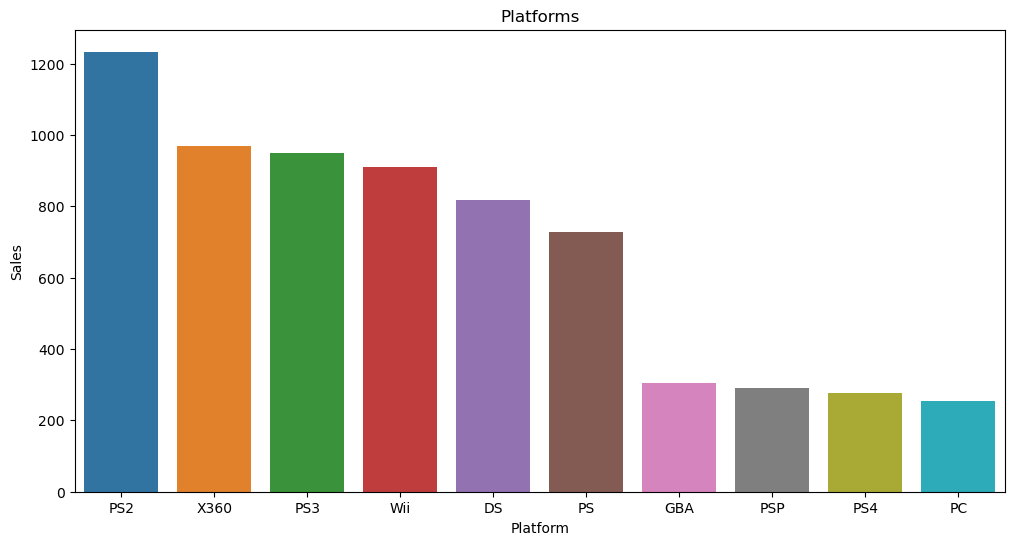

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=Top_platforms.index,y=Top_platforms)
plt.ylabel("Sales")
plt.title("Platforms");

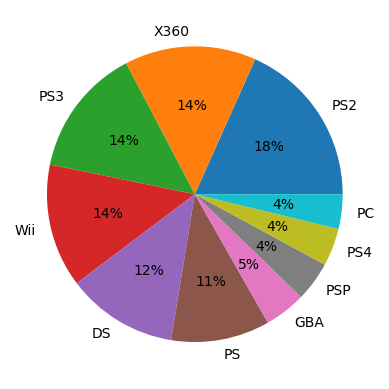

<Figure size 1200x700 with 0 Axes>

In [27]:
plt.pie(Top_platforms,labels=Top_platforms.index, autopct='%.0f%%');
plt.figure(figsize=(12,7));

In [28]:
sales_per_year=df.groupby('Year')['Global_Sales'].sum()

Text(0, 0.5, 'Sales')

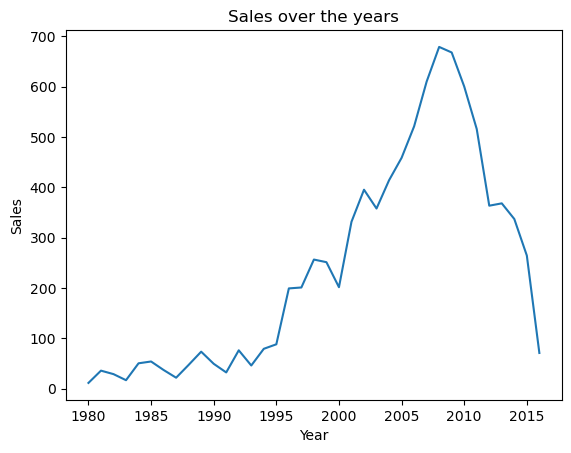

In [29]:
sns.lineplot(y=sales_per_year,x=sales_per_year.index)
plt.title("Sales over the years")
plt.ylabel("Sales")

In [30]:
columns_to_drop = [ 'Other_Sales']
df_dropped = df.drop(columns=columns_to_drop)

C:\Users\Mr.Grizwold\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


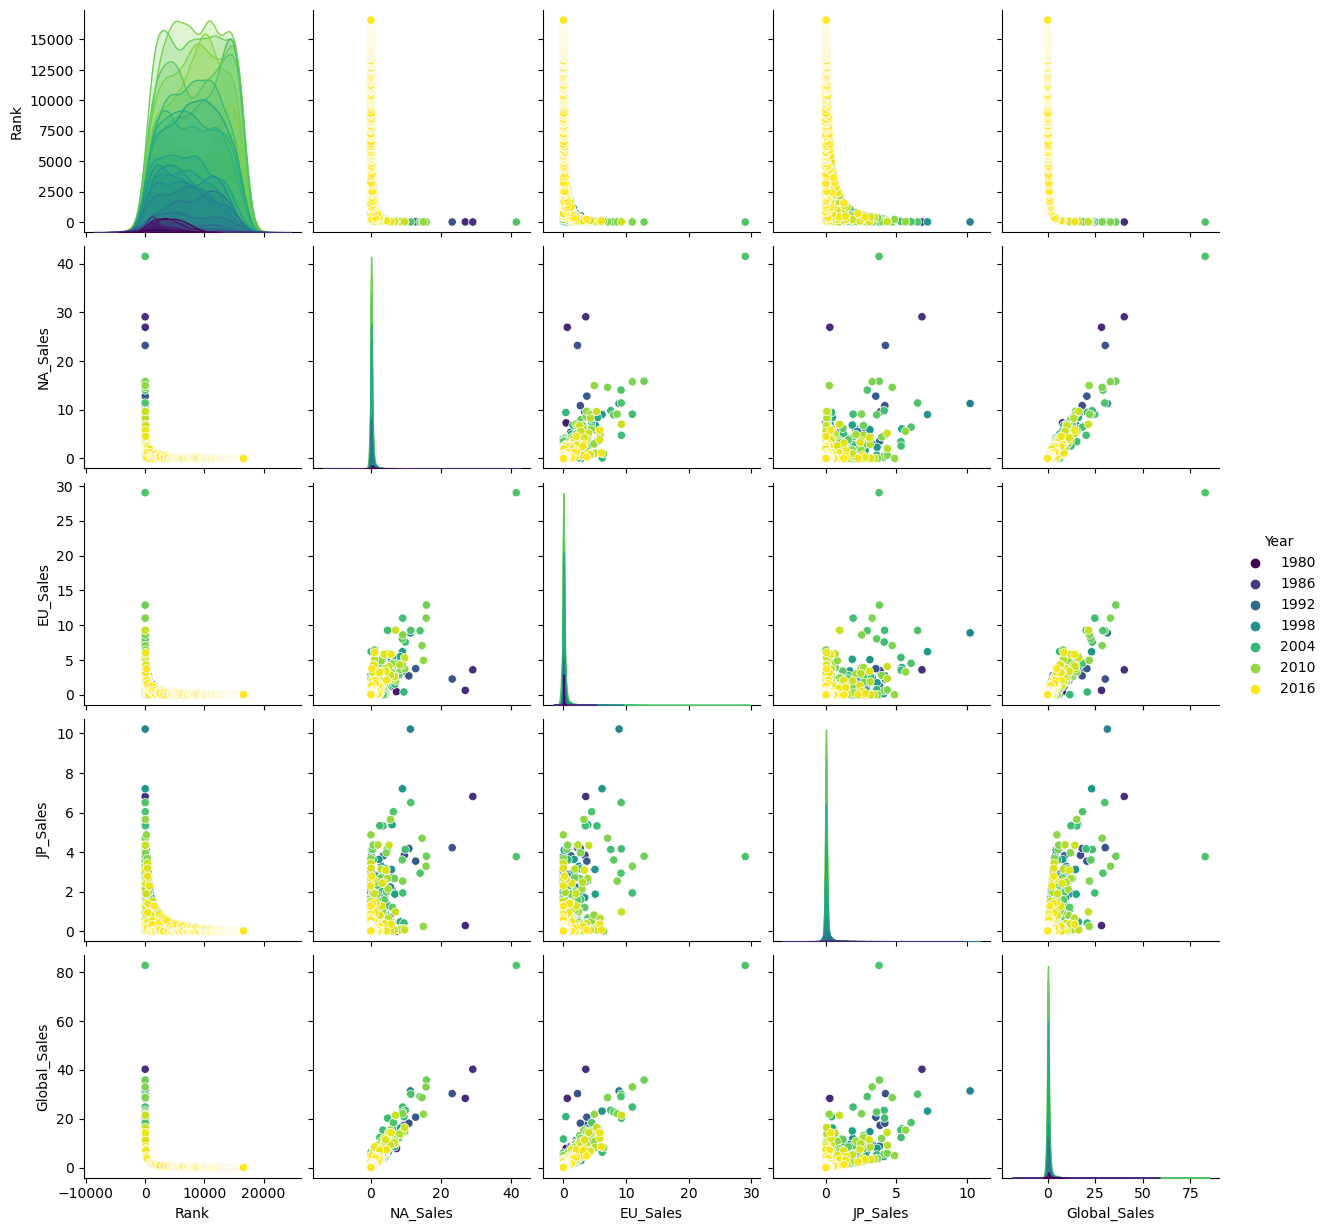

In [31]:
sns.pairplot(df_dropped, hue='Year', palette='viridis')